# Milestone 1

Hasil analisa Milestone 1 dirangkum dalam satu dashboard interaktif tableau di link berikut: [Energy Consumption](https://public.tableau.com/views/Milestone1_17320938498500/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

## Perkenalan

```
Nama  : Dini Anggriyani
Batch : HCK-23

Program ini dibuat untuk melakukan pemetaan terhadap tingkat konsumsi energi bangunan di Singapura sebgai syarat pemenuhan Milestone 1.
```

# Business Understanding

## Latar Belakang
Akhir-akhir ini kondisi iklim di Singapore terasa lebih panas karena konsumsi energi yang banyak dan berakibat kepada pemanasan global yang dialami oleh sebagian besar warga. Pemerintah Singapore menargetkan penurunan tingkat konsumsi energi sebanyak 10% di tahun 2025 untuk bangunan yang lebih hijau [Link artikel](https://www.reccessary.com/en/news/sg-regulation/energy-intensive-buildings-forced-to-improve-efficiency-in-singapore#:~:text=To%20reduce%20the%20carbon%20emissions,to%20be%20fewer%20than%20100.). Sebagai seorang data analis yang bekerja untuk Pemerintah Singapore, saya bertugas untuk melakukan perencanaan pengurangan konsumsi energi dengan melakukan pemetaan berdasarkan tipe-tipe dan luas bangunan  di Singapore.

## SMART Framework
* Spesific => Melakukan pemetaan tingkat konsumsi energi di Singapore
* Measurable => Menurunkan Tingkat konsumsi energi di Singapore sampai 10%
* Achieveble => Dengan melihat hubungan antara greenmark status, tipe-tipe bangunan, dan luas bangunan dari data 2 tahun 
lalu, perencanaan penurunan konsumsi energi sampai 10% di Singapore mungkin didapatkan
* Relevant => Penurunan Tingkat konsumsi energi di Singapore dapat berdampak kepada terciptanya bangunan yang lebih hijau
* Time-bond => Target penurunan Tingkat energi akan diimplementasikan selama kurang lebih 1 tahun sampai 2025

## Problem Statement
Kesimpulan:
Dengan melakukan pemetaan Tingkat konsumsi energi dan hubungannya terhadap greenmark status, greenmark rating, tipe bangunan, luas bangunan, perencanaan penurunan Tingkat konsumsi energi 10% dan penciptaan bangunan yang lebih hijau yang akan diterapkan selama kurang lebih 1 tahun mungkin didapatkan.

[Link dataset](https://www.kaggle.com/datasets/claytonmiller/annual-energy-consumption-from-singapore-buildings/data)

## Problem Breakdown (contoh: 5W1H)
Analisa 5W + 1 H:
What: 
1. Apa yang menjadi factor konsumsi energi di Singapore?
2. Tipe bangunan seperti apa yang memiliki Tingkat konsumsi energi terbanyak?
3. Apakah tipe bangunan yang lebih besar sudah pasti memiliki Tingkat konsumsi energi yang juga besar?
4. Sampai kapan penerapan energi dilakukan? 1 tahun sampai 2025
5. Kepada siapa kebijakan penurunan Tingkat konsumsi energi diterapkan? Penerapan kebijakan penurunan Tingkat konsumsi 
   energi akan diterapkan kepada para pelaku usaha yang memiliki tipe bangunan tertentu
6. Daerah mana yang memiliki Tingkat konsumsi energi terbesar?
7. Bagaimana lebel greenmark status memengaruhi Tingkat konsumsi energi di Singapore?

# Data Loading

In [4]:
import pandas as pd
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Sumber data yang didapatkan berasal dari: https://www.kaggle.com/datasets/claytonmiller/annual-energy-consumption-from-singapore-buildings/data. Data kemudian disimpan dalam bentuk csv.

Mengimport data dari file berbentuk csv

In [5]:
teams = pd.read_csv("energy_consumptions.csv")
teams

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,greenmarkyearaward,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity,voluntarydisclosure
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,NaN,Small,"5,036",81.0,105.0,Y
1,NaN,NaN,Retail,No,NaN,NaN,Small,NaN,475.0,402.0,N
2,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,2018.0,Large,"65,640",382.0,365.0,Y
3,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,2018.0,Large,"102,356",212.0,183.0,Y
4,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,2017.0,Large,"15,769",203.0,181.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
1239,NaN,NaN,Office,No,NaN,NaN,Small,NaN,230.0,173.0,N
1240,POMO,"1 SELEGIE ROAD, SINGAPORE 188306",Private School,Yes,Platinum,2010.0,Large,"21,832",288.0,261.0,Y
1241,NaN,NaN,Office,No,NaN,NaN,Small,NaN,203.0,204.0,N
1242,PARKWAY PARADE,"80 MARINE PARADE ROAD, SINGAPORE 449269",Office,Yes,Platinum,2016.0,Large,"99,012",326.0,330.0,Y


# Data Cleaning

Proses data cleaning yang akan dijalankan pada proyek ini meliputi penghapusan kolom yang tidak perlu, penghapusan baris yang berisi missing value, dan penghapusan karakter, dan pengubahan tipe data suatu kolom.

Daftar nama kolom

In [6]:
teams.columns

Index(['buildingname', 'buildingaddress', 'buildingtype', 'greenmarkstatus',
       'greenmarkrating', 'greenmarkyearaward', 'buildingsize',
       'grossfloorarea', '2017energyuseintensity', '2018energyusintensity',
       'voluntarydisclosure'],
      dtype='object')

Penghapusan kolom yang tidak perlu

In [7]:
teams_new = teams.drop(columns=['voluntarydisclosure', 'greenmarkyearaward'])
teams_new

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity
0,HEXACUBE,"160 CHANGI ROAD, SINGAPORE 419728",Mixed Development,No,NaN,Small,"5,036",81.0,105.0
1,NaN,NaN,Retail,No,NaN,Small,NaN,475.0,402.0
2,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,Large,"65,640",382.0,365.0
3,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,Large,"102,356",212.0,183.0
4,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,Large,"15,769",203.0,181.0
...,...,...,...,...,...,...,...,...,...
1239,NaN,NaN,Office,No,NaN,Small,NaN,230.0,173.0
1240,POMO,"1 SELEGIE ROAD, SINGAPORE 188306",Private School,Yes,Platinum,Large,"21,832",288.0,261.0
1241,NaN,NaN,Office,No,NaN,Small,NaN,203.0,204.0
1242,PARKWAY PARADE,"80 MARINE PARADE ROAD, SINGAPORE 449269",Office,Yes,Platinum,Large,"99,012",326.0,330.0


Menampilkan tipe data dari tiap kolom

In [8]:
teams_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buildingname            783 non-null    object 
 1   buildingaddress         986 non-null    object 
 2   buildingtype            1244 non-null   object 
 3   greenmarkstatus         1244 non-null   object 
 4   greenmarkrating         306 non-null    object 
 5   buildingsize            1189 non-null   object 
 6   grossfloorarea          986 non-null    object 
 7   2017energyuseintensity  1224 non-null   float64
 8   2018energyusintensity   1224 non-null   float64
dtypes: float64(2), object(7)
memory usage: 87.6+ KB


Penanganan missing value

Untuk memudahkan pemetaan, data yang akan dianalisis adalah data yang hanya memiliki kelengkapan atribut greenmark status, greenmark rating, grossfloor area, dan building size. Oleh karena itu, baris yang memiliki missing value akan dihilangkan.

In [9]:
df =teams_new.dropna(how='any')
df

,buildingname,buildingaddress,buildingtype,greenmarkstatus,greenmarkrating,buildingsize,grossfloorarea,2017energyuseintensity,2018energyusintensity
2,CITY SQUARE MALL,"180 KITCHENER ROAD, SINGAPORE 208539",Retail,Yes,Platinum,Large,"65,640",382.0,365.0
3,REPUBLIC PLAZA,"9 RAFFLES PLACE, SINGAPORE 048619",Office,Yes,Platinum,Large,"102,356",212.0,183.0
4,CENTRAL MALL,"1 MAGAZINE ROAD, SINGAPORE 059567",Office,Yes,Platinum,Large,"15,769",203.0,181.0
5,KINEX,"11 TANJONG KATONG ROAD, SINGAPORE 437157",Retail,Yes,Gold,Large,"28,938",431.0,396.0
17,PARLIAMENT HOUSE COMPLEX,"1 PARLIAMENT PLACE, SINGAPORE 178880",Office,Yes,Platinum,Large,"19,765",127.0,132.0
...,...,...,...,...,...,...,...,...,...
1196,SCAPE,"2 ORCHARD LINK, SINGAPORE 237978",Mixed Development,Yes,Gold,Small,"13,102",370.0,359.0
1231,SINGAPORE POOLS BUILDING,"210 MIDDLE ROAD, SINGAPORE 188994",Office,Yes,GoldPlus,Small,"13,121",264.0,264.0
1234,INTERNATIONAL BUILDING,"360 ORCHARD ROAD, SINGAPORE 238869",Office,Yes,GoldPlus,Large,"15,267",349.0,535.0
1240,POMO,"1 SELEGIE ROAD, SINGAPORE 188306",Private School,Yes,Platinum,Large,"21,832",288.0,261.0


In [87]:
df.to_csv("cleaned_data.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 2 to 1242
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buildingname            258 non-null    object 
 1   buildingaddress         258 non-null    object 
 2   buildingtype            258 non-null    object 
 3   greenmarkstatus         258 non-null    object 
 4   greenmarkrating         258 non-null    object 
 5   buildingsize            258 non-null    object 
 6   grossfloorarea          258 non-null    object 
 7   2017energyuseintensity  258 non-null    float64
 8   2018energyusintensity   258 non-null    float64
dtypes: float64(2), object(7)
memory usage: 20.2+ KB


Penghapusan karakter yang tidak perlu

In [21]:
df['grossfloorarea'].str.replace(",", "")

2        65640
3       102356
4        15769
5        28938
17       19765
         ...  
1196     13102
1231     13121
1234     15267
1240     21832
1242     99012
Name: grossfloorarea, Length: 258, dtype: object

In [22]:
df['grossfloorarea'].unique

<bound method Series.unique of 2        65640
3       102356
4        15769
5        28938
17       19765
         ...  
1196     13102
1231     13121
1234     15267
1240     21832
1242     99012
Name: grossfloorarea, Length: 258, dtype: object>

Merubah beberapa tipe data

In [32]:
df['grossfloorarea'].astype(float)

2        65640.0
3       102356.0
4        15769.0
5        28938.0
17       19765.0
          ...   
1196     13102.0
1231     13121.0
1234     15267.0
1240     21832.0
1242     99012.0
Name: grossfloorarea, Length: 258, dtype: float64

Kolom yang sudah diubah tipe datanya:

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 2 to 1242
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buildingname            258 non-null    object 
 1   buildingaddress         258 non-null    object 
 2   buildingtype            258 non-null    object 
 3   greenmarkstatus         258 non-null    object 
 4   greenmarkrating         258 non-null    object 
 5   buildingsize            258 non-null    object 
 6   grossfloorarea          258 non-null    float64
 7   2017energyuseintensity  258 non-null    float64
 8   2018energyusintensity   258 non-null    float64
dtypes: float64(3), object(6)
memory usage: 20.2+ KB


# Analisis dan perhitungan

Statistika Deskriptif

Perhitungan statistika deskriptif yang dibuat meliputi rata-rata, median, modus, variance dan standar deviasi dan dari konsumsi energi dan luas bangunan serta distribusi data

In [ ]:
mean_energy_2017 = df['2017energyuseintensity'].mean()
print("Rata-rata konsumsi energi tahun 2017: ", mean_energy_2017)
mean_energy_2018 = df['2018energyusintensity'].mean()
print("Rata-rata konsumsi energi tahun 2018: ", mean_energy_2018)
mean_luas_bangunan = df['grossfloorarea'].mean()
print("Rata-rata luas bangunan: ", mean_luas_bangunan)

Rata-rata konsumsi energi tahun 2017:  261.5658914728682
Rata-rata konsumsi energi tahun 2018:  259.1821705426357
Rata-rata luas bangunan:  63741.27131782946


In [ ]:
median_energy_2017 = df['2017energyuseintensity'].median()
print("Median nilai konsumsi energi tahun 2017: ", median_energy_2017)
median_energy_2018 = df['2018energyusintensity'].median()
print("Median nilai konsumsi energi tahun 2018: ", median_energy_2018)
median_luas_bangunan = df['grossfloorarea'].median()
print("Median nilai luas bangunan: ", median_luas_bangunan)

Median nilai konsumsi energi tahun 2017:  219.5
Median nilai konsumsi energi tahun 2018:  216.5
Median nilai luas bangunan:  29082.5


In [ ]:
modus_energy_2017 = df['2017energyuseintensity'].mode()
print("Modus nilai konsumsi energi tahun 2017: ", modus_energy_2017)
modus_energy_2018 = df['2018energyusintensity'].mode()
print("Modus nilai konsumsi energi tahun 2018: ", modus_energy_2018)
modus_luas_bangunan = df['grossfloorarea'].mode()
print("Modus nilai luas bangunan: ", modus_luas_bangunan)

Modus nilai konsumsi energi tahun 2017:  0    134.0
Name: 2017energyuseintensity, dtype: float64
Modus nilai konsumsi energi tahun 2018:  0    132.0
1    181.0
Name: 2018energyusintensity, dtype: float64
Modus nilai luas bangunan:  0    3000
Name: grossfloorarea, dtype: int64


In [ ]:
Q1 = df['2017energyuseintensity'].quantile(0.25)
Q2 = df['2017energyuseintensity'].quantile(0.5)
Q3 = df['2017energyuseintensity'].quantile(0.75)

IQR = Q3 - Q1
IQR

np.float64(186.5)

In [ ]:
std_energy_2017 = df['2017energyuseintensity'].std()
print("Standar deviasi nilai konsumsi energi tahun 2017: ", std_energy_2017)
std_energy_2018 = df['2018energyusintensity'].std()
print("Standar deviasi nilai konsumsi energi tahun 2018: ", std_energy_2018)
std_luas_bangunan = df['grossfloorarea'].std()
print("Standar deviasi nilai luas bangunan: ", std_luas_bangunan)

Standar deviasi nilai konsumsi energi tahun 2017:  164.12867899267096
Standar deviasi nilai konsumsi energi tahun 2018:  160.3982693705275
Standar deviasi nilai luas bangunan:  188644.70536208508


In [ ]:
var_energy_2017 = df['2017energyuseintensity'].var()
print("Variance nilai konsumsi energi tahun 2017: ", var_energy_2017)
var_energy_2018 = df['2018energyusintensity'].var()
print("Variance nilai konsumsi energi tahun 2018: ", var_energy_2018)
var_luas_bangunan = df['grossfloorarea'].var()
print("Variance nilai luas bangunan: ", std_luas_bangunan)

Variance nilai konsumsi energi tahun 2017:  26938.223267879224
Variance nilai konsumsi energi tahun 2018:  25727.604817060295
Variance nilai luas bangunan:  188644.70536208508


Tes kenormalan data:

In [ ]:
from scipy import stats
res = stats.shapiro(df['2017energyuseintensity'])
print(f'p-value energy use 2017: {res.pvalue}')
res = stats.shapiro(df['2018energyusintensity'])
print(f'p-value energy use 2018: {res.pvalue}')
res = stats.shapiro(df['grossfloorarea'])
print(f'p-value gross floor area: {res.pvalue}')

p-value energy use 2017: 7.284023998217903e-14
p-value energy use 2018: 1.5441694598857432e-14
p-value gross floor area: 1.2885586267045072e-31


P-value memiliki nilai > 0,05 artinya data terdistribusi normal. Namun, untuk lebih memastikan akan diadakan tes lebih lanjut

Distribusi Discrete

<Axes: xlabel='grossfloorarea'>

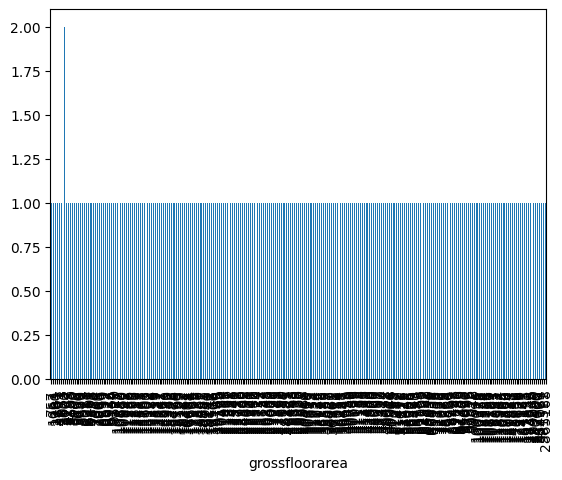

In [ ]:
df['grossfloorarea'].value_counts().sort_index().plot(kind='bar')

Distribusi Continous

<Axes: ylabel='Frequency'>

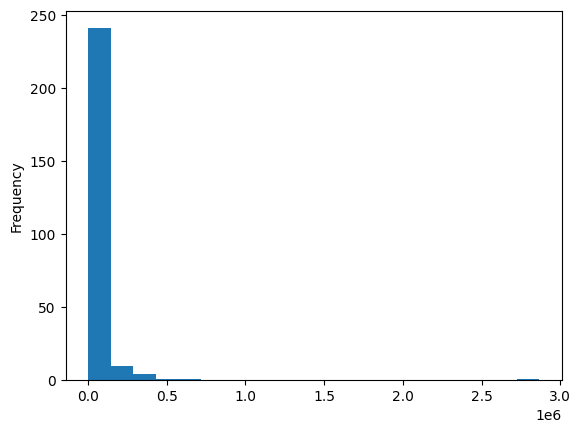

In [ ]:
df['grossfloorarea'].plot(kind='hist',bins=20)

Tes Skewness

In [ ]:
print(f"Skewness energy use 2017: {df['2017energyuseintensity'].skew()}")
print(f"Skewness energy use 2018: {df['2018energyusintensity'].skew()}")
print(f"Skewness gross floor area: {df['grossfloorarea'].skew()}")

Skewness energy use 2017: 1.6835529771853637
Skewness energy use 2018: 1.7868564024757543
Skewness gross floor area: 13.014107568158257


Nilai skewness > 1 artinya data masuk ke dalam kategori highly skewed dengan ekor condong ke kanan

Tes Kurtosis

In [ ]:
print(f"Kurtosis energy use 2017: {df['2017energyuseintensity'].kurtosis()}")
print(f"Kurtosis energy use 2018: {df['2018energyusintensity'].kurtosis()}")
print(f"Kurtosis gross floor area: {df['grossfloorarea'].kurtosis()}")

Kurtosis energy use 2017: 4.225773685237011
Kurtosis energy use 2018: 4.899058132382727
Kurtosis gross floor area: 191.06047138895065


Nilai kurtosis > 0 artinya data masuk ke dalam kategori leptokurtic

Tes keberadaan Outliers

In [92]:
print("Total konsumsi energi tahun 2017: ", df['2017energyuseintensity'].sum())
print("Total konsumsi energi tahun 2018: ", df['2018energyusintensity'].sum())

Total konsumsi energi tahun 2017:  67484.0
Total konsumsi energi tahun 2018:  66869.0


Perhitungan selanjutnya hanya akan menggunakan data konsumsi energi tahun 2017 karena memiliki jumlah konsumsi energi yang lebih besar sehingga dianggap mewakili keseluruhan populasi.

Metode Tukey's Rule

Karena data yang kita miliki bersifat skewed, maka analisa nilai ekstrim menggunakan Metode Tukey's Rule

Upper Boundary: 427.00
Lower Boundary: -132.50
Percentage of out_liers: 14.34%


<Axes: >

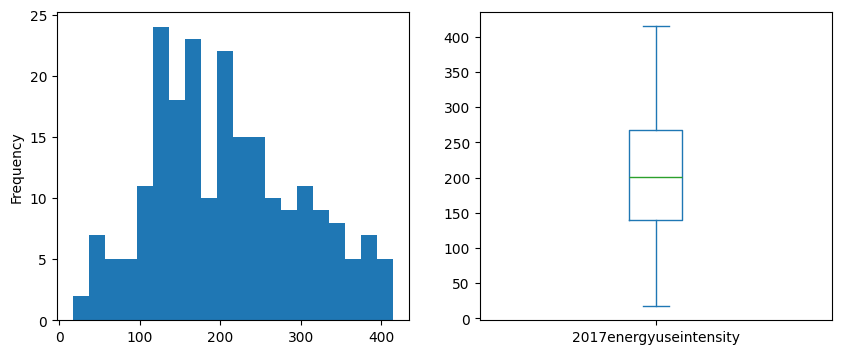

In [ ]:
upper_bound = Q1 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

print(f'Upper Boundary: {upper_bound:.2f}' )
print(f'Lower Boundary: {lower_bound:.2f}')

out_lier = df['2017energyuseintensity'][(df['2017energyuseintensity']<lower_bound) | (df['2017energyuseintensity']>upper_bound)]
no_out_lier = df['2017energyuseintensity'][(df['2017energyuseintensity']>=lower_bound) & (df['2017energyuseintensity']<=upper_bound)]

print(f'Percentage of out_liers: {len(out_lier)*100/len(df["2017energyuseintensity"]):.2f}%')

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_out_lier.plot(kind='hist',bins=20,ax=ax[0])
no_out_lier.plot(kind='box',ax=ax[1])

Perhitungan menggunakan Metode Tukey's Rule menghasilkan data yang sudah bersih dari outliers.

Selanjutnya, akan diadakan uji korelasi antara greenmark status, greenmark rating, tipe bangunan, ukuran bangunan, luas bangunan dengan tingkat konsumsi energi.

In [42]:
df.columns

Index(['buildingname', 'buildingaddress', 'buildingtype', 'greenmarkstatus',
       'greenmarkrating', 'buildingsize', 'grossfloorarea',
       '2017energyuseintensity', '2018energyusintensity'],
      dtype='object')

### Korelasi antara luas bangunan dengan konsumsi energi

```
Karena data yang kita miliki bersifat numerical dan data yang dimiliki tidak bersifat normal, maka pengujian yang dilakukan menggunakan Metode Spearman dengan asumsi:
H0 = Tidak ada hubungan antara luas bangunan dan konsumsi energi
H1 = Ada hubungan antara luas bangunan dan konsumsi energi
```

In [49]:
corr_r, pval_p = stats.spearmanr(df['grossfloorarea'], df['2017energyuseintensity'])
print(f"r-correlation of energy use in 2017: {corr_r:.2f}, p-value: {pval_p}")
corr_r, pval_p = stats.spearmanr(df['grossfloorarea'], df['2018energyusintensity'])
print(f"r-correlation of energy use in 2018: {corr_r:.2f}, p-value: {pval_p}")

r-correlation of energy use in 2017: 0.02, p-value: 0.7384019844391823
r-correlation of energy use in 2018: 0.02, p-value: 0.7194195738951705


Penggambaran korelasi dua variable ini digambarkan dalam grafik berikut: 

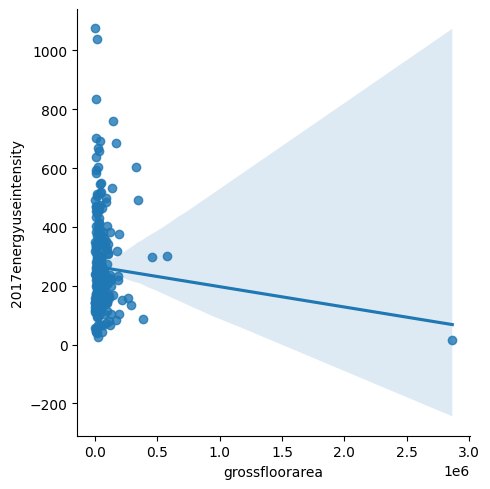

In [113]:
sns.lmplot(data=df,x='grossfloorarea', y='2017energyuseintensity')

Dari perhitungan di atas, dapat disimpulkan bahwa terdapat hubungan yang sangat lemah antara luas bangunan dengan tingkat konsumsi energi. 

### Korelasi antara ukuran bangunan dengan konsumsi energi

Untuk semakin menguatkan hasil analisa permasalahan sebelumnya, akan dilakukan uji korelasi antara ukuran bangunan dengan konsumsi energi. Kali ini, data yang diuji bersifat ordinal maka metode yang digunakan adalah Metode Kendal. Korelasinya digambarkan dalam grafik berikut:

```
Korelasi kedua variable adalah sebagai berikut:
H0 = Tidak ada hubungan antara ukuran bangunan dan konsumsi energi
H1 = Ada hubungan antara ukuran bangunan dan konsumsi energi
```

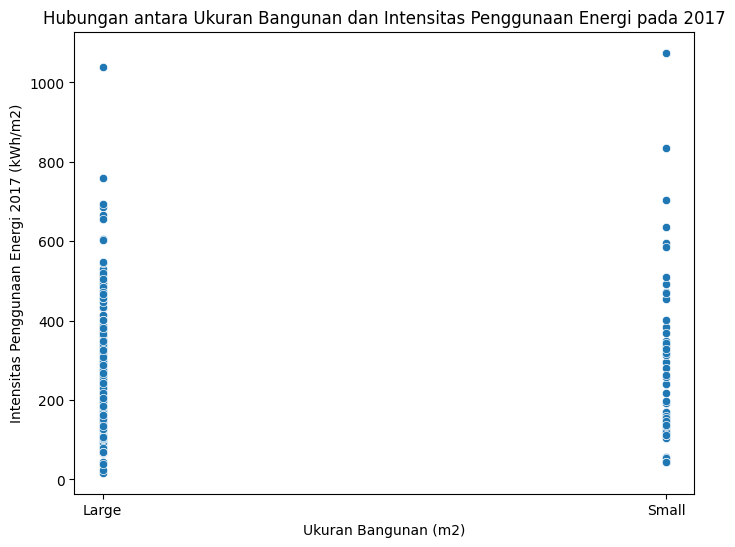

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='buildingsize', y='2017energyuseintensity', data=df)
plt.title('Hubungan antara Ukuran Bangunan dan Intensitas Penggunaan Energi pada 2017')
plt.xlabel('Ukuran Bangunan (m2)')
plt.ylabel('Intensitas Penggunaan Energi 2017 (kWh/m2)')
plt.show()

Perhitungan analisa untuk mendukung grafik di atas adalah sebagai berikut:

In [48]:
corr_r, pval_p = stats.kendalltau(df['buildingsize'], df['2017energyuseintensity'])
print(f"r-correlation between building size and energy use in 2017: {corr_r:.2f}, p-value: {pval_p}")
corr_r, pval_p = stats.kendalltau(df['buildingsize'], df['2018energyusintensity'])
print(f"r-correlation between building size and energy use in 2018: {corr_r:.2f}, p-value: {pval_p}")

r-correlation between building size and energy use in 2017: -0.02, p-value: 0.6739948486644466
r-correlation between building size and energy use in 2018: -0.02, p-value: 0.7413872369515593


Hasil analisa antara ukuran bangunan dengan tingkat konsumsi energi juga tidak menunjukan keterkaitan yang signifikan.

### Apakah ada korelasi antara greenmark rating dengan konsumsi energi

```
Untuk pengujian kedua korelasi ini digunakan Metode Kendall dengan 
H0 = Tidak adanya korelasi antara greenmark rating dengan konsumsi energi 
H1 = Adanya korelasi antara greenmark rating dengan konsumsi energi
Penggambaran korelasinya dijelaskan dalam grafik berikut:
```

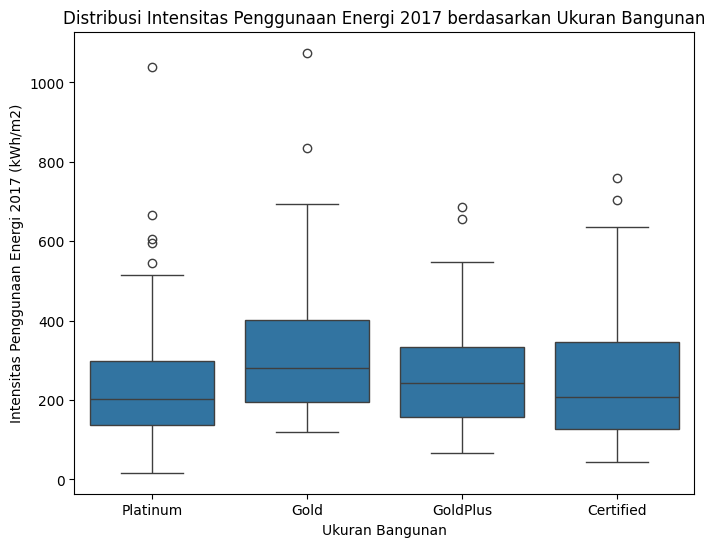

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='greenmarkrating', y='2017energyuseintensity', data=df)
plt.title('Distribusi Intensitas Penggunaan Energi 2017 berdasarkan Ukuran Bangunan')
plt.xlabel('Ukuran Bangunan')
plt.ylabel('Intensitas Penggunaan Energi 2017 (kWh/m2)')
plt.show()

Perhitungan analisa untuk mendukung grafik di atas adalah sebagai berikut:

In [68]:
nilai_r, nilai_p = stats.kendalltau(df['greenmarkrating'], df['2017energyuseintensity'])

print(f"Kendall Tau Correlation 2017: {nilai_r:.2f}, p-value: {nilai_p:.3f}")
nilai_r, nilai_p = stats.kendalltau(df['greenmarkrating'], df['2018energyusintensity'])

print(f"Kendall Tau Correlation 2018: {nilai_r:.2f}, p-value: {nilai_p:.3f}")

Kendall Tau Correlation 2017: -0.11, p-value: 0.017
Kendall Tau Correlation 2018: -0.12, p-value: 0.013


Dari hasil analisa di atas, nilai Kendall Tau -0,11 dan -0,12 menunjukan adanya hubungan yang relatif lemah antara green mark rating dengan konsumsi energi. Namun p-value yang ada < 0,05 menunjukan bahwa korelasi tersebut terjadi bukan karena kebetulan. Hasil perhitungan menunjukan bahwa kita menolak asumsi H0. Artinya, pada bangunan yang memiliki green mark rating lebih tinggi mungkin mengonsumsi energi lebih sedikit meskipun pengaruhnya tidak terlalu signifikan tapi cukup terbukti dalam data yang ada. Analisa lebih lanjut akan dilakukan untuk mengetahui faktor lain yang mungkin berpengaruh terhadap konsumsi energi

### Apakah ukuran bangunan ada hubungannya dengan pemberian greenmark rating?


```
Asumsi awal adalah sebagai berikut:
H0 = Tidak ada korelasai antara pemberian greenmark rating dengan ukuran bangunan
H1 = Ada korelasi antara pemberian greenmark rating dengan ukuran bangunan
Penggambaran korelasi keduanya digambarkan dalam grafik berikut:
```

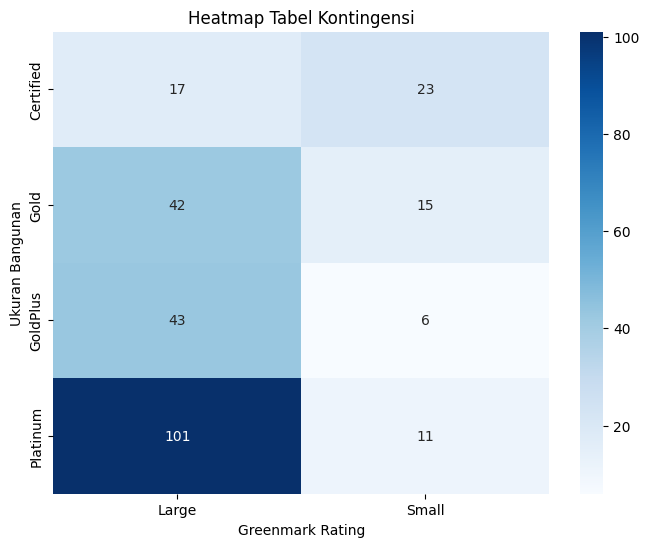

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap Tabel Kontingensi')
plt.xlabel('Greenmark Rating')
plt.ylabel('Ukuran Bangunan')
plt.show()

Metode yang digunakan dalam uji ini adalah Metode Chi Kuadrat karena mengukur dua variable yang bersifat categorical

In [106]:
contingency_table = pd.crosstab(df['greenmarkrating'], df['buildingsize'])
contingency_table

res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 2.126741001859884e-09


Nilai p-value < 0,05 menunjukan bahwa H0 ditolak. Artinya ada korelasi antara pemberian greenmark rating dengan ukuran bangunan.

Statistika Inferensial

### Apakah ukuran bangunan berhubungan dengan luas bangunan?

```
Karena kolom buildingsize hanya terdapat 2 value unik, maka bisa menggunakan Metode Uji Two Sample Test dengan asumsi sebagai berikut:
H0 = Tidak ada hubungan antara ukuran bangunan dengan luas bangunan
H1 = Ada hubungan antara ukuran bangunan dengan luas bangunan
Hubungan korelasi kedua kolom digambarkan dalam grafik berikut:
```

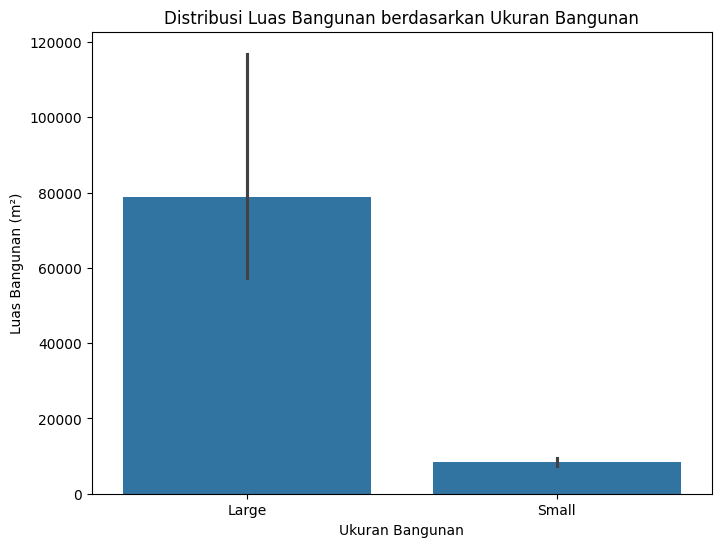

In [124]:
plt.figure(figsize=(8, 6))
sns.barplot(x='buildingsize', y='grossfloorarea', data=df)
plt.title('Distribusi Luas Bangunan berdasarkan Ukuran Bangunan')
plt.xlabel('Ukuran Bangunan')
plt.ylabel('Luas Bangunan (m²)')
plt.show()

Untuk mendukung grafik di atas, dilakukan perhitungan statistik sebagai berikut:

In [111]:
f_statistic, p_value = stats.f_oneway(df[df['buildingsize'] == 'Large']['grossfloorarea'],
                                      df[df['buildingsize'] == 'Small']['grossfloorarea'])

# Menampilkan hasil uji
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 6.138591021674978
P-value: 0.013872193944974427


Berdasarkan perhitungan di atas, nilai p-value < 0,05 artinya kita dapat menolak asumsi H0 dan menganggap bahwa terdapat hubungan antara ukuran bangunan dengan luas bangunan

### Apakah tipe bangunan tertentu mengonsumsi lebih banyak energi?

Untuk menjawab pertanyaan ini, metode yang akan digunakan adalah Metode ANOVA. Untuk melangkah lebih lanjut, perlu diketahui terlebih dahulu tipe-tipe bangunan.

In [74]:
df['buildingtype'].unique()


array(['Retail', 'Office', 'Hotel', 'Mixed Development', 'Polytechnic',
       'Nursing Home', 'Univerisity', 'Specialist Centre (Public)',
       'General Hospital/ Specialist Centre (Public)', 'ITE',
       'Polyclinic', 'Community Hospital', 'Private School',
       'Private Hospital (Private)', 'Private College'], dtype=object)

```
Untuk menyederhanakan analisa, tipe bangunan dibagi ke dalam 3 kategori bangunan: pendidikan, kesehatan, dan komersil. Dengan asumsi berikut:
H0 = Tidak ada hubungan antara tipe bangunan dengan tingkat konsumsi energi
H1 = Ada hubungan antara tipe bangunan dengan tingkat konsumsi energi
```

In [ ]:
#membuat kategori bangunan yang disederhanakan
def categorical (buildingtype):
    if buildingtype in ['Polytechnic', 'Private College', 'Private School', 'Univerisity']:
        return 'pendidikan'
    elif buildingtype in ['Nursing Home', 'Private Hospital (Private)', 'Polyclinic', 'General Hospital/ Specialist Centre (Public)', 'Specialist Centre (Public)', 'Community Hospital']:
        return 'kesehatan'
    else:
        return 'komersial'

# Untuk operasi ini, saya ingin membuat salinan DataFrame agar tidak merusak data asli
df_copy = df.copy()

# Operasi dilakukan pada salinan
df_copy['building_category'] = df_copy['buildingtype'].apply(categorical)


#menambahkan kolom baru ke dataframe yang lama
# df['building_category'] = df['buildingtype'].apply(categorical)

In [84]:
f_stat, p_value = stats.f_oneway(
    df[df_copy['building_category'] == 'pendidikan']['2017energyuseintensity'],
    df[df_copy['building_category'] == 'kesehatan']['2017energyuseintensity'],
    df[df_copy['building_category'] == 'komersial']['2017energyuseintensity']
)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.3f}")

F-statistic: 4.58, p-value: 0.011


Nilai p-value < 0,05 menunjukan bahwa kita dapat menolak hasil H0 yang artinya terdapat perbedaan antara tipe bangunan dengan tingkat konsumsi energi. Penggambaran korelasi antara dua variabel tersebut digambarkan dalam grafik di bawah ini: 

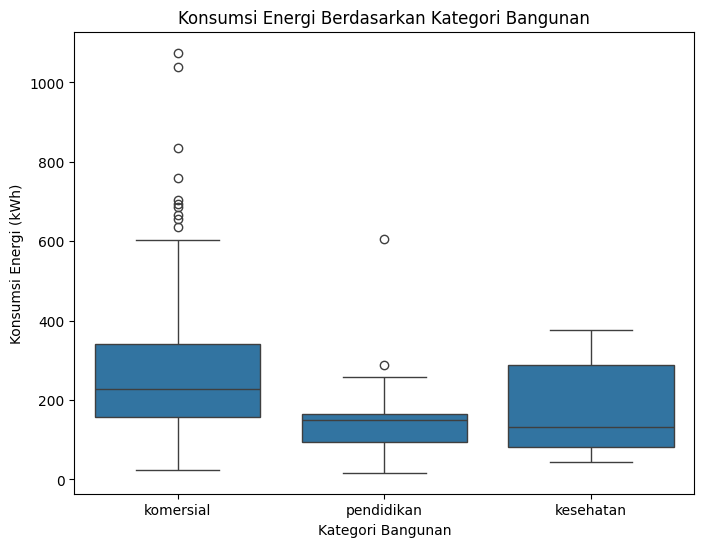

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='building_category', y='2017energyuseintensity', data=df)
plt.title('Konsumsi Energi Berdasarkan Kategori Bangunan')
plt.xlabel('Kategori Bangunan')
plt.ylabel('Konsumsi Energi (kWh)')
plt.show()


Grafik di atas menunjukan batas atas dan batas bawah tingkat konsumsi energi masing-masing tipe bangunan dan dapat dibuat kesimpulan urutan bangunan yang memiliki tingkat konsumsi energi dari yang terbanyak ke terendah adalah: bangunan komersial, kesehatan, dan pendidikan. Untuk mendapatkan angka pasti tingkat konsumsi masing-masing tipe bangunan, kita akan menjalankan fungsi berikut:

In [86]:
# Mengelompokkan dan menghitung rata-rata, minimum, dan maksimum konsumsi energi per kategori bangunan
energy_stats = df_copy.groupby('building_category')['2017energyuseintensity'].agg(['mean', 'min', 'max'])

# Menampilkan hasil
print(energy_stats)

                         mean   min     max
building_category                          
kesehatan          175.769231  45.0   377.0
komersial          272.208696  25.0  1075.0
pendidikan         172.733333  17.0   605.0


# Kesimpulan

Dari hasil perhitungan di atas, dapat disimpulkan bahwa tingkat konsumsi energi dipengaruhi oleh green mark rating dan tipe bangunan. Sedangkan luas bangunan dan ukuran bangunan tidak memiliki hubungan dengan tingkat konsumsi energi. Namun, ukuran bangunan memiliki sedikit korelasi dengan pemberian green mark rating yang secara tidak langsung mempengaruhi tingkat konsumsi energi. Dalam upaya mengurangi tingkat konsumsi energi di Singapore, pemerintah dapat melakukan penyuluhan dan melakukan pengesahan kebijakan baru kepada bangunan-bangunan tipe komersil dan juga bangunan-bangunan yang memiliki green mark rating Platinum dan Gold untuk lebih mengontrol tingkat konsumsi energi mereka mengingat dua tipe ini adalah tipe bangunan yang memiliki tingkat konsumsi energi tertinggi di antara tipe-tipe bangunan yang lain.

Gambaran singkat dari hasil tableau yang sudah dibuat adalah sebagai berikut

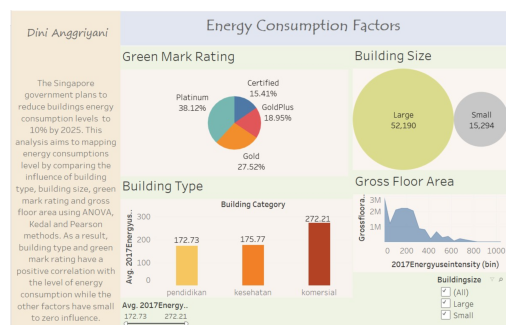

In [128]:
import matplotlib.image as mpimg

img = mpimg.imread('Tableau.jpg')


plt.imshow(img)
plt.axis('off')
plt.show()